In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

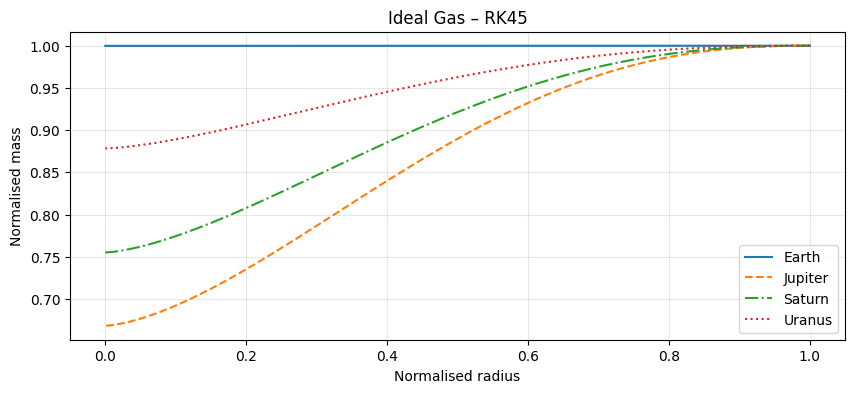

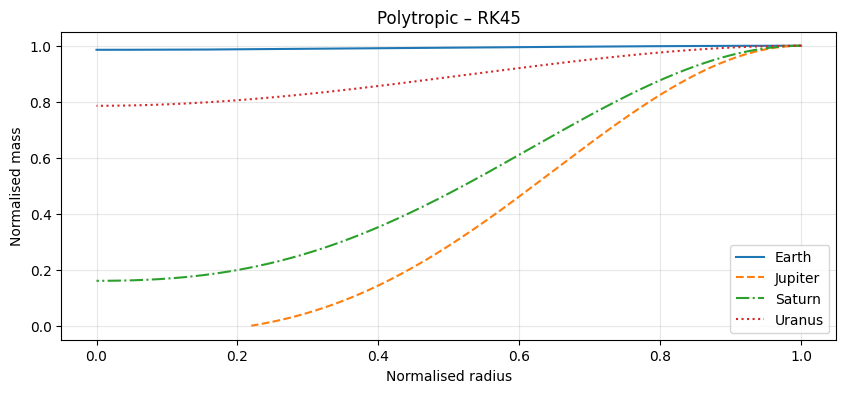

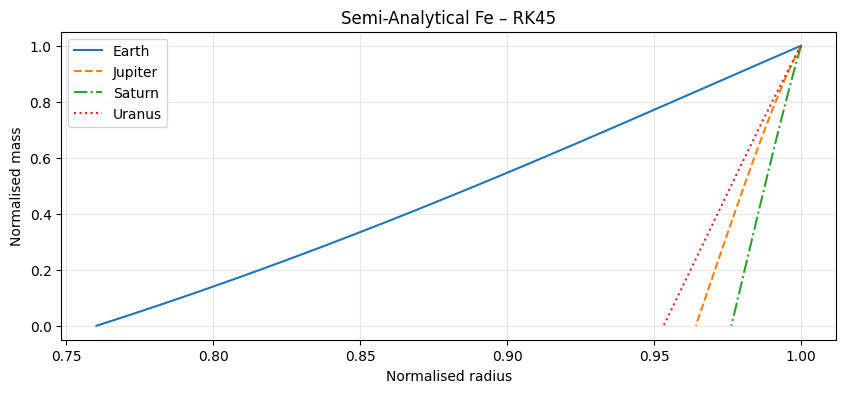

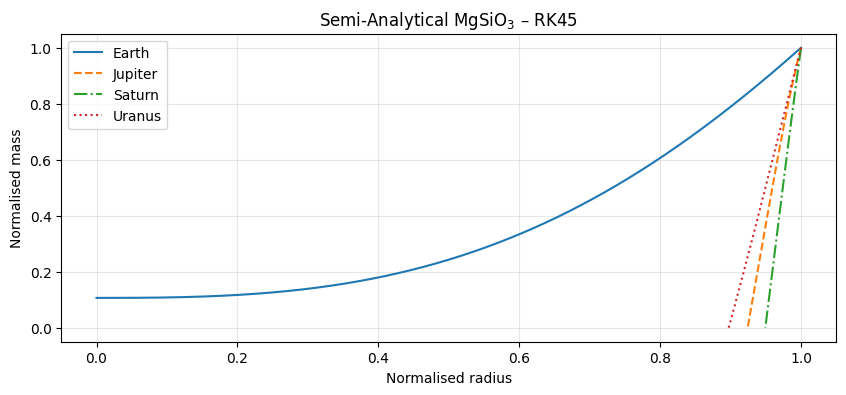

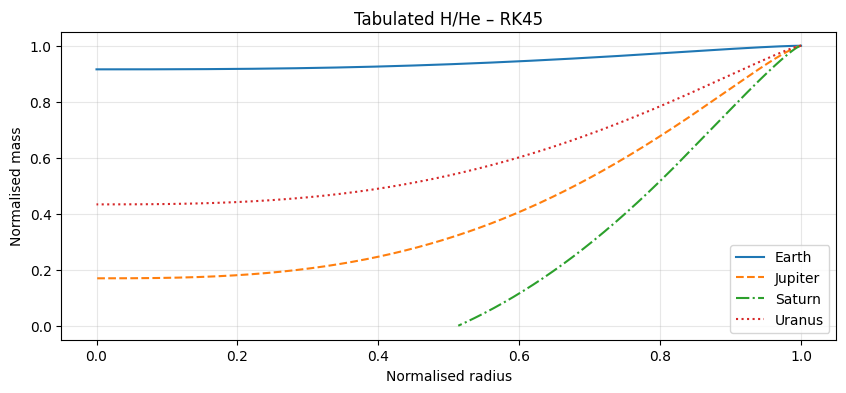

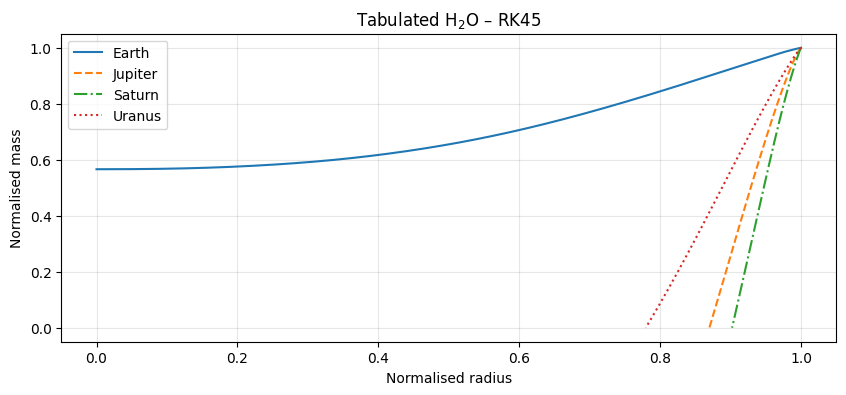

In [2]:
sim_names = {
    1 : '01_ideal_gas',
    2 : '02_polytropic',
    3 : '03_analytical_Fe',
    4 : '04_analytical_MgSiO3',
    5 : '05_tabulated_H',
    6 : '06_tabulated_H2O'
}

def nice_name(no):
    name = sim_names[no]
    name_parts = name.split('_')

    sim_name = ''
    for part in name_parts[1:]:
        if part == 'MgSiO3':
            part = 'MgSiO$_3$'
        elif part == 'H2O':
            part = 'H$_2$O'
        elif part == 'H':
            part = 'H/He'
        elif part == 'analytical':
            part = 'Semi-Analytical'
        if part and part[0].islower():
            part = part[0].upper() + part[1:]
        sim_name += part + ' '
    return sim_name

def plot_eos(no):
    planets = ['Earth', 'Jupiter', 'Saturn', 'Uranus']
    # ------------------- load ------------------
    datas = []
    for planet in planets:
        file_name = f'{planet}_{sim_names[no]}_RK45_theta_2.csv'
        file_path = os.path.join('data', 'simulation_results', 'plot_5', f'0{no}', file_name)
        data = np.loadtxt(file_path, skiprows=1, delimiter=',') 
        datas.append(data)

    # ------------------- plot ------------------
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]
    plt.figure(figsize=(10, 4))
    for linestyle, planet, data in zip(linestyles, planets, datas):
        R0 = data[:,0][0]
        M0 = data[:,1][0]
        plt.plot(data[:,0]/R0, data[:,1]/M0, label=planet, linestyle=linestyle)

    plt.title(f'{nice_name(no)}\u2013 RK45')
    # plt.yscale('log')
    plt.xlabel('Normalised radius')
    plt.ylabel('Normalised mass')
    plt.grid(True, alpha=0.3)
    plt.legend()

    file_name = f'plot_5_different_planets_{sim_names[no]}.pdf'

    folder_path = os.path.join('plots')
    file_path = os.path.join(folder_path, file_name)
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(file_path)

    plt.show()
    plt.close()

for no in [1,2,3,4,5,6]:
    plot_eos(no)